In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dataset/Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Handle Missing Values

In [7]:
df["GRE Score"].mode()

0    312
dtype: int64

In [8]:
df['GRE Score'].fillna(df["GRE Score"].mode()[0],inplace = True)

### X,Y Split

In [9]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# alternative
# axis = 1 -> column
# x = df.drop(["Chance of Admit","Serial No"],axis=1)
# y = df["Chance of Admit"]

In [10]:
x.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1


### EDA

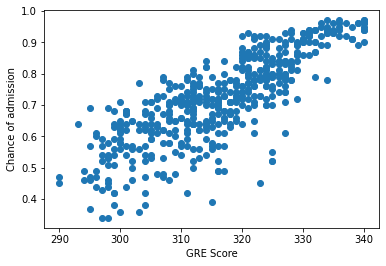

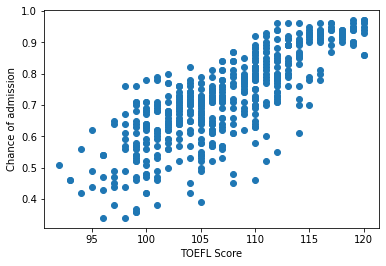

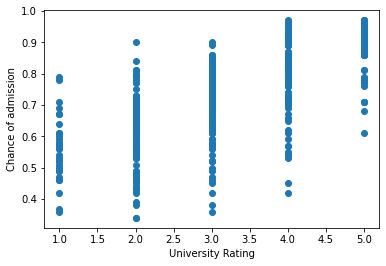

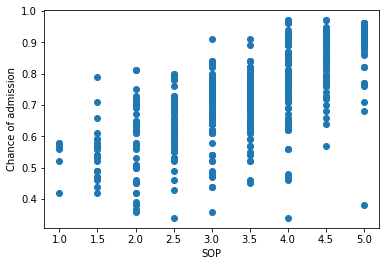

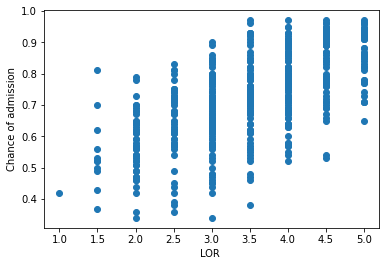

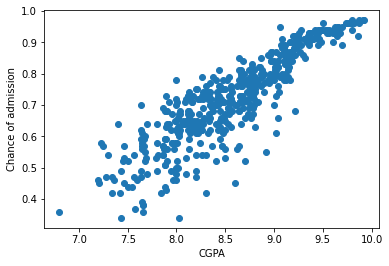

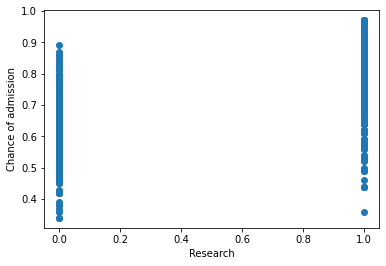

In [11]:
for col in x.columns:
    plt.scatter(x[col],y)
    plt.xlabel(col)
    plt.ylabel("Chance of admission")
    plt.show()

### Pre Processing

In [43]:
from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()
scaled_data = scaler_feature.fit_transform(x)

In [45]:
scaled_data[:10]

array([[ 1.81923762,  1.77886545,  0.77558214,  1.13735981,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214,  0.63231549,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, -0.37777315,  0.01730621,
        -0.95404281,  0.88640526],
       [ 0.48990382,  0.46216267, -0.09979274,  0.12727117, -1.06433187,
         0.15484742,  0.88640526],
       [-0.21907421, -0.68995225, -0.97516761, -1.3878618 , -0.52351283,
        -0.6064802 , -1.12815215],
       [ 1.19888185,  1.28510191,  1.65095702,  1.13735981, -0.52351283,
         1.26373765,  0.88640526],
       [ 0.40128156,  0.29757483, -0.09979274, -0.37777315,  0.55812525,
        -0.6230308 ,  0.88640526],
       [-0.75080773, -1.01912795, -0.97516761, -0.37777315,  0.55812525,
        -1.11954882, -1.12815215],
       [-1.28254125, -0.8545401 , -1.85054249, -1.3878618 , -2.14596996,
        -0.95404281, -1.12815215],
       [ 0.57852607,  0.1329

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

#random_state : just to get same random selection each time
# ex: pick 10th row each time

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [16]:
from sklearn.metrics import r2_score
score = r2_score(reg.predict(x_test), y_test)

In [21]:
score

In [31]:
y_pred = reg.predict(x_test)
y_test

69     0.78
29     0.54
471    0.64
344    0.47
54     0.70
       ... 
308    0.69
171    0.89
457    0.37
75     0.72
311    0.84
Name: Chance of Admit , Length: 150, dtype: float64

### Check Fit 

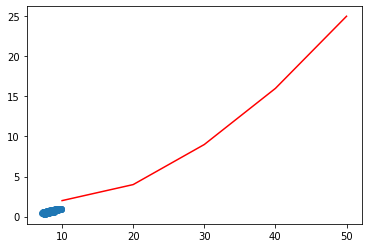